In [80]:
import numpy as np
import awkward as ak

from math import pi

import matplotlib as mpl
import matplotlib.pyplot as plt

from coffea.util import load
import mplhep as hep

In [3]:
filename = "/work/mmarcheg/PocketCoffea/output/particle_transformer/ntuples_2018_v01/output_all.coffea"
o = load(filename)

In [4]:
o["columns"]

{'WJetsToLNu_HT': {'inclusive': {'JetGood_N': column_accumulator(array([5, 4, 4, ..., 5, 4, 5])),
   'JetGood_pt': column_accumulator(array([ 84.10015 ,  59.226944,  49.604774, ..., 243.56166 , 129.83961 ,
           83.97896 ], dtype=float32)),
   'JetGood_eta': column_accumulator(array([ 0.28393555, -1.1516113 , -0.21398926, ..., -1.6394043 ,
          -1.5722656 ,  1.7058105 ], dtype=float32)),
   'JetGood_phi': column_accumulator(array([ 0.14208984,  2.6328125 , -3.0488281 , ...,  0.16635132,
           1.5839844 ,  1.1533203 ], dtype=float32)),
   'JetGood_hadronFlavour': column_accumulator(array([0, 0, 0, ..., 0, 4, 0], dtype=int32)),
   'JetGood_btagDeepFlavB': column_accumulator(array([0.9995117 , 0.9975586 , 0.00407028, ..., 0.00500107, 0.44750977,
          0.00317955], dtype=float32)),
   'LeptonGood_pt': column_accumulator(array([ 59.121197,  51.81971 ,  42.720654, ...,  39.93852 , 128.17023 ,
          185.38495 ], dtype=float32)),
   'LeptonGood_eta': column_accumulator(a

In [42]:
df = o["columns"]["ttHTobb"]["inclusive"]
df.keys()

dict_keys(['JetGood_N', 'JetGood_pt', 'JetGood_eta', 'JetGood_phi', 'JetGood_hadronFlavour', 'JetGood_btagDeepFlavB', 'LeptonGood_pt', 'LeptonGood_eta', 'LeptonGood_phi', 'LeptonGood_pdgId', 'MET_phi', 'MET_pt', 'MET_significance'])

In [50]:
njet = df["JetGood_N"].value
pt = df["JetGood_pt"].value
eta = df["JetGood_eta"].value
phi = df["JetGood_phi"].value
hadronFlavour = df["JetGood_hadronFlavour"].value
btag = df["JetGood_btagDeepFlavB"].value
branches = ['pt', 'eta', 'phi', 'hadronFlavour', 'btagDeepFlavB']
jet = {}
for var in branches:
    jet[var] = ak.unflatten(df[f"JetGood_{var}"].value, njet)

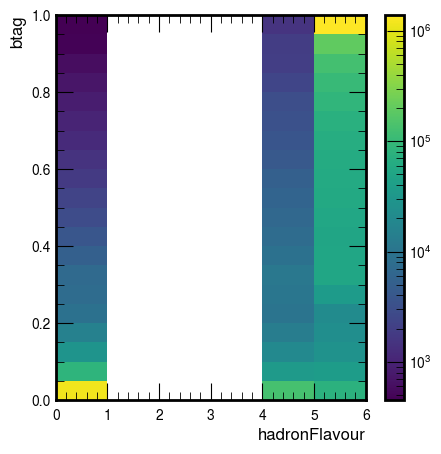

In [68]:
fontsize=12
plt.style.use([hep.style.ROOT, {'font.size': fontsize}])
plt.rcParams.update({'font.size': fontsize})

fig, ax = plt.subplots(1, 1, figsize=(5,5))
plt.hist2d(hadronFlavour, btag, bins=(range(7), np.linspace(0, 1, 21)), norm=mpl.colors.LogNorm());
plt.xlabel("hadronFlavour")
plt.ylabel("btag")
plt.colorbar();
#plt.xlim();

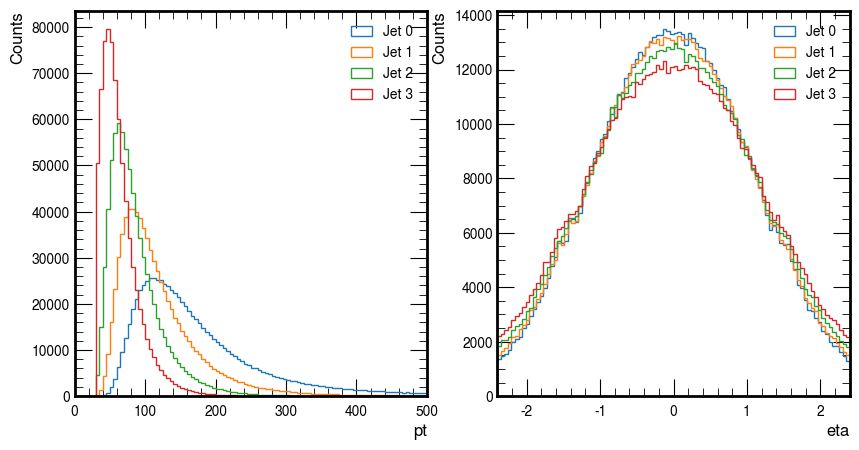

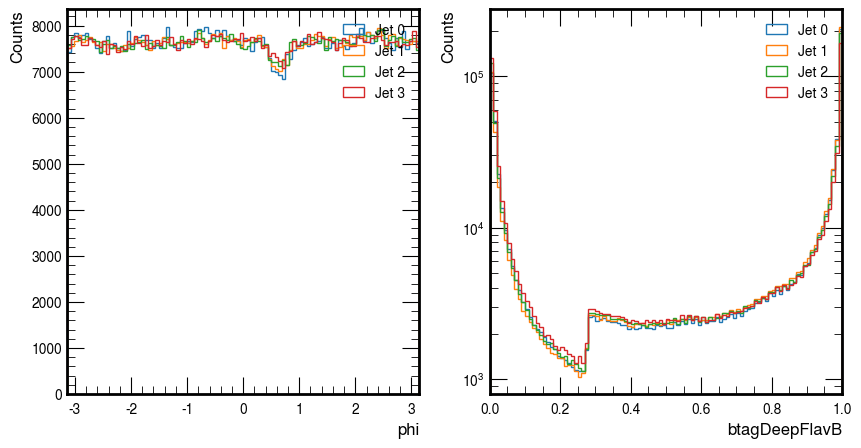

In [81]:
ranges = {'pt' : (0,500), 'eta' : (-2.4,2.4), 'phi' : (-pi,pi), 'btagDeepFlavB' : (0,1)}
scales = {'pt' : "linear", 'eta' : "linear", 'phi' : "linear", 'btagDeepFlavB' : "log"}
for i, var in enumerate(ranges.keys()):
    if i%2 == 0:
        fig, axes = plt.subplots(1,2,figsize=[10,5])
    for pos in range(4):
        x = jet[var][:,pos]
        axes[i%2].hist(x, bins=100, range=ranges[var], histtype='step', label=f'Jet {pos}')
    axes[i%2].set_yscale(scales[var])
    axes[i%2].legend()
    axes[i%2].set_xlim(*ranges[var])
    axes[i%2].set_xlabel(var)
    axes[i%2].set_ylabel("Counts");